In [35]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [23]:
with open("hivedges2.csv", 'r') as f:
    next(f)  # Skip the first line
    g = nx.parse_edgelist(f, delimiter=",")
    
df = pd.read_csv('hivedges2.csv')
df.shape

(85890, 2)

In [3]:
id1 = set(df['id1'].unique())
id2 = set(df['id2'].unique())
len(id1), len(id2), type(id1)

(4941, 27724, set)

In [4]:
overlap = id1.intersection(id2)
len(overlap)

2063

In [30]:
f"unique nodes in graph :{len(g.nodes)}, #edges: {len(g.edges)}"

'unique nodes in graph :30602, #edges: 44981'

In [36]:
degrees = [val for (node, val) in g.degree()]
degree_counts = collections.Counter(degrees)
print(f"Average degree: {sum(degrees) / len(degrees)}")

Average degree: 2.939742500490164


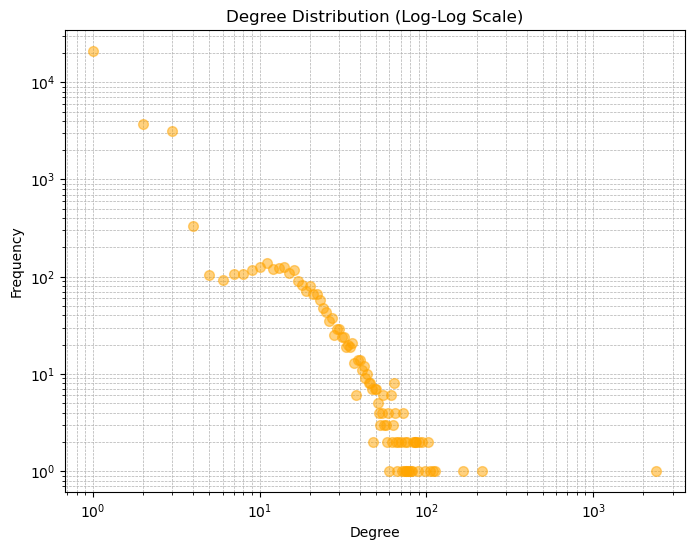

In [47]:
degree, count = zip(*degree_counts.items())

# log-log scale plot
plt.figure(figsize=(8, 6))
plt.loglog(degree, count, marker='o', linestyle='none', markersize=7, color='orange', alpha=0.5)
plt.title("Degree Distribution (Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

In [56]:
# top nodes:
degrees = [(node, val) for (node, val) in g.degree()]
degrees = sorted(degrees, key=lambda x: x[1], reverse=True)
degrees[:10]

[('0', 2398),
 ('00-8', 217),
 ('179', 165),
 ('16', 113),
 ('1', 109),
 ('40', 105),
 ('77', 102),
 ('53', 102),
 ('9', 98),
 ('107', 94)]

In [49]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(g)
betweenness_centrality = nx.betweenness_centrality(g)
closeness_centrality = nx.closeness_centrality(g)

# Top 5 nodes by degree centrality
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality:", top_nodes)

KeyboardInterrupt: 

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

# Detect communities using the Greedy Modularity algorithm
communities = greedy_modularity_communities(g)
print(f"Number of communities detected: {len(communities)}")

In [ ]:
# Print the nodes in each community
for i, community in enumerate(communities):
    print(f"Community {i+1}: {list(community)}")
    print(len(community))
    if i>10:
        break

In [ ]:
community_of_interest = communities[9]

# Create a subgraph containing only the nodes in this community
subgraph = g.subgraph(community_of_interest)

In [ ]:
# Plot the subgraph with a layout
plt.figure(figsize=(10, 8))

# Use a layout (e.g., spring layout)
pos = nx.spring_layout(subgraph)

# Draw the subgraph
nx.draw(subgraph, pos, with_labels=True, node_size=200, node_color="skyblue", font_size=6, edge_color="gray")
plt.title("Community Subgraph")
plt.show()

### data 3 edgelist

In [29]:
df2 = pd.read_csv('hivedges3.csv', skiprows=1, header= None)
g2 = nx.from_pandas_edgelist(df2, target=1, source=0)
len(g2.nodes)

29672